In [43]:
pip install python-pptx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


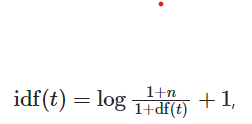

Using the **TfidfTransformer’s default settings**, *TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)* the **term frequency**, the number of times a term occurs in a given document, is multiplied with **idf component** which is computed as above equation where *n* is the total number of documents in the document set, and *df(t)* is the number of documents in the document set that contain term. The resulting **tf-idf vectors** are then normalized by the Euclidean norm:

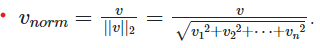

**cosine_similarity** computes the *L2-normalized dot product of vectors*. 
That is, if *x* and *y* are row vectors, their cosine similarity is defined as:
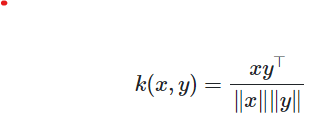

# **Importing the APIs**

In [46]:
import string                     # Module to utitlize string related constants, utility functions and string manipulations
import csv                        # Module to implement lasses to read and write tabular data in CSV format
from io import StringIO           # Module to manage file-related input and output operations. The advantage of using the IO module is that the classes and functions
                                  # available allows us to extend the functionality to enable writing to the Unicode data.
from pptx import Presentation     # Module for creating and updating PowerPoint (.pptx) files. A typical use would be generating a customized PowerPoint presentation 
                                  # from database content, downloadable by clicking a link in a web application.
import docx2txt                   # Module purely python-based utility to extract text from docx files. 
import PyPDF2                     # Module with free and open-source pure-python PDF library capable of splitting, merging, cropping, and transforming the pages of PDF files.
import spacy                      # Module which helps us to use both Python and C / C++ functions and debugging tools. Also used for NLP
import pandas as pd   
import numpy as np
import nltk                       # Toolkit build for working with NLP in Python. It provides us various text processing libraries with a lot of test datasets.
import re                         # Module that provides regular expression matching operations similar to those found in Perl.
import openpyxl                   # Module that is used to read from an Excel file or write to an Excel file
from nltk.stem import WordNetLemmatizer
"""
Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, 
lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters,
often leading to incorrect meanings and spelling errors.
"""
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf - Term Frequency times inverse-document frequency
"""In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the 
   actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies 
   of rarer yet more interesting terms. In order to re-weight the count features into floating point values suitable for usage by a classifier 
   it is very common to use the tf–idf transform.""" 
from sklearn.metrics.pairwise import cosine_similarity
"""Compute cosine similarity between samples in X and Y.
   Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y:
   K(X, Y) = <X, Y> / (||X||*||Y||)
   On L2-normalized data, this function is equivalent to linear_kernel."""
from gensim.parsing.preprocessing import STOPWORDS as SW
"""
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, 
both when indexing entries for searching and when retrieving them as the result of a search query.
"""
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import networkx as nx
from networkx.algorithms.shortest_paths import weighted
import glob
from google.colab import drive
drive.mount('/content/drive')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Word Document Reader**

In [47]:
class wordDocReader:
  def __init__(self, file_path: str) -> str:
    self.file_path = file_path
    
  def word_reader(self):

    text = docx2txt.process(self.file_path)
    text = text.replace('\n', ' ')
    text = text.replace('\xa0', ' ')
    text = text.replace('\t', ' ')
    return text 

## **Power Point Reader**

In [48]:
class pptReader:
    
    def __init__(self, file_path: str) -> None:
        self.file_path = file_path
        
    def ppt_text(self) -> str:
      
      prs = Presentation(self.file_path)
      text = str()

      for slide in prs.slides:
        for shape in slide.shapes:
          if not shape.has_text_frame:
              continue
          for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
              text += ' ' + run.text
      return text

## **Excel Reader**

In [49]:
class xlsxReader:
    
    def __init__(self, file_path: str) -> str:
        self.file_path = file_path
        
    def xlsx_text(self):
      
      inputExcelFile = self.file_path
      text = str()
      wb = openpyxl.load_workbook(inputExcelFile)
      #This will save the excel sheet as a CSV file
      for sn in wb.sheetnames:
        excelFile = pd.read_excel(inputExcelFile, engine = 'openpyxl', sheet_name = sn)
        excelFile.to_csv("ResultCsvFile.csv", index = None, header=True)

        with open("ResultCsvFile.csv", "r") as csvFile: 
          lines = csvFile.read().split(",") # "\r\n" if needed
          for val in lines:
            if val != '':
              text += val + ' '
          text = text.replace('\ufeff', '')
          text = text.replace('\n', ' ')
      return text

## **PDF Reader Class**


In [50]:
class pdfReader:
    
    def __init__(self, file_path: str) -> str:
        self.file_path = file_path
    
    def PDF_one_pager(self) -> str:
        content = ""
        p = open(self.file_path, "rb")
        pdf = PyPDF2.PdfReader(p)
        num_pages = len(pdf.pages)
        for i in range(0, num_pages):
            content += pdf.pages[i].extract_text() + "\n"
        content = " ".join(content.replace(u"\xa0", " ").strip().split())
        page_number_removal = r"\d{1,3} of \d{1,3}"
        page_number_removal_pattern = re.compile(page_number_removal, re.IGNORECASE)
        content = re.sub(page_number_removal_pattern, '',content)
        
        return content
  
    def pdf_reader(self) -> str:
        opener = open(self.file_path,'rb')
        read_pdf = PyPDF2.PdfFileReader(opener)
    
        return read_pdf
  
  
    def pdf_info(self) -> dict:
        opener = open(self.file_path,'rb')
        read_pdf = PyPDF2.PdfFileReader(opener)
        pdf_info_dict = {}
        for key,value in read_pdf.documentInfo.items():
            pdf_info_dict[re.sub('/',"",key)] = value
        return pdf_info_dict
  
    def pdf_dictionary(self) -> dict:
        opener = open(self.file_path,'rb')
        read_pdf = PyPDF2.PdfReader(opener)
        length = read_pdf.pages
        pdf_dict = {}
        for i in range(length):
            page = read_pdf.getPage(i)
            text = page.extract_text()
            pdf_dict[i] = text
            return pdf_dict

## **CSV Reader**

In [51]:
class csvReader:
    
    def __init__(self, file_path: str) -> str:
        self.file_path = file_path
        
    def csv_text(self):
      text = str()
      with open(self.file_path, "r") as csvFile: 
        lines = csvFile.read().split(",") # "\r\n" if needed
        for val in lines:
          text += val + ' '
        text = text.replace('\ufeff', '')
        text = text.replace('\n', ' ')
      return text

## **Word Document Class**

In [52]:
class wordDocReader:
  def __init__(self, file_path: str) -> str:
    self.file_path = file_path
    
  def word_reader(self):
    text = docx2txt.process(self.file_path)
    text = text.replace('\n', ' ')
    text = text.replace('\xa0', ' ')
    text = text.replace('\t', ' ')
    return text 

## **Power Point Class**

In [53]:
class pptReader:
    
    def __init__(self, file_path: str) -> str:
        self.file_path = file_path
        
    def ppt_text(self):
      prs = Presentation(self.file_path)
      text = str()
      for slide in prs.slides:
        for shape in slide.shapes:
          if not shape.has_text_frame:
              continue
          for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
              text += ' ' + run.text
                  
      return text

## **Data Preprocessing**

In [54]:
class dataprocessor:
  def __init__(self):
    return
  
  @staticmethod
  def get_wordnet_pos(text: str) -> str:
    tag = nltk.pos_tag([text])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
  
  @staticmethod
  def preprocess(text: str):
    #lowercase
    text = text.lower()
    
    #punctuation removal
    text = "".join([i for i in text if i not in string.punctuation])
    
    #Digit removal (Only for ALL numeric numbers)
    text = [x for x in text.split(' ') if x.isnumeric() == False]
    
    #Stop removal
    stopwords = nltk.corpus.stopwords.words('english')
    custom_stopwords = ['\n','\n\n', '&', ' ', '.', '-', '$', '@']
    stopwords.extend(custom_stopwords)

    text = [i for i in text if i not in stopwords]
    text = ' '.join(word for word in text)
    
    #lemmanization
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word, dataprocessor.get_wordnet_pos(word)) for word in text.split(' ')]
    text = ' '.join(word for word in text)
    
    text = re.sub(' +', ' ',text)
    
    return text


  @staticmethod
  def data_reader(list_file_names):
    text_list = []
    reader = dataprocessor()
    for file in list_file_names:
      temp = file.split('.')
      filetype = temp[-1]
      if filetype == "pdf":
        file_pdf = pdfReader(file)
        text = file_pdf.pdf_one_liner()

      elif filetype == "docx":
        word_doc_reader = wordDocReader(file)
        text = word_doc_reader.word_reader()

      elif filetype == "pptx" or filetype == 'ppt':
        ppt_reader = pptReader(file)
        text = ppt_reader.ppt_text()
        
      elif filetype == "csv":
        csv_reader = csvReader(file)
        text = csv_reader.csv_text()
      
      elif filetype == 'xlsx':
        xl_reader = xlsxReader(file)
        text = xl_reader.xlsx_text()
      else:
        print('File type {} not supported!'.format(filetype))
        continue
      
      text = reader.preprocess(text)
      text_list.append(text)
      file_dict = dict()
      for i,file in enumerate(list_file_names):
        file_dict[i] = (file, file.split('/')[-1])
      return text_list, file_dict

  @staticmethod
  def database_processor(file_dict,text_list: list):
    file_vector_dict = dict()
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(text_list)
    feature_names = vectorizer.get_feature_names_out()
    matrix = vectors.todense()
    list_dense = matrix.tolist()
    for i in range(len(list_dense)):
      file_vector_dict[file_dict[i][1]] = list_dense[i]

    return list_dense, vectorizer, file_vector_dict

  @staticmethod
  def input_processor(text, TDIF_vectorizor):
    words = ''
    total_words = len(text.split(' '))
    for word in text.split(' '):
      words += (word + ' ') * total_words
      total_words -= 1

    words = [words[:-1]]
    words = TDIF_vectorizor.transform(words)
    words = words.todense()
    words = words.tolist()
    return words

  @staticmethod
  def similarity_checker(vector_1, vector_2):
    vectors = [vector_1, vector_2]
    for vec in vectors:
      if np.ndim(vec) == 1:
        vec = np.expand_dims(vec, axis=0)
    return cosine_similarity([vector_1], vector_2)

  @staticmethod
  def recommender(vector_file_list,query_vector, file_dict):
    similarity_list = []
    score_dict = dict()
    for i,file_vector in enumerate(vector_file_list):
      x = dataprocessor.similarity_checker(file_vector, query_vector)
      score_dict[file_dict[i][1]] = (x[0][0])
      similarity_list.append(x)
    similarity_list = sorted(similarity_list, reverse = True)
    #Recommends the top 20%
    recommended = sorted(score_dict.items(), 
                  key=lambda x:-x[1])[:int(np.round(.5*len(similarity_list)))]
  
    final_recommendation = []
    for i in range(len(recommended)):
      final_recommendation.append(recommended[i][0])
    #add in graph for greater than 3 recommendationa
    return final_recommendation, similarity_list[:len(final_recommendation)]

  @staticmethod
  def ranker(recommendation_val, file_vec_dict):
    my_graph = nx.Graph()
    for i in range(len(recommendation_val)):
      file_1 = recommendation_val[i]
      for j in range(len(recommendation_val)):
        file_2 = recommendation_val[j]

        if i != j:
          #Calculate sim_score between two values (weight)
          edge_dist = cosine_similarity([file_vec_dict[recommendation_val[i]]],[file_vec_dict[recommendation_val[j]]])
          #add an edge from file 1 to file 2 with the weight 
          my_graph.add_edge(file_1, file_2, weight=edge_dist)

    #Pagerank the graph  ]    
    rec = nx.eigenvector_centrality(my_graph)
    #Takes 20% of the values
    ec_recommended = sorted(rec.items(), key=lambda x:-x[1])[:int(np.round(len(rec)))]

    return ec_recommended

  @staticmethod
  def weighted_final_rank(sim_list,ec_recommended,final_recommendation):
    final_dict = dict()

    for i in range(len(sim_list)):
      val = (.8*sim_list[final_recommendation.index(ec_recommendation[i][0])].squeeze()) + (.2 * ec_recommendation[i][1])
      final_dict[ec_recommendation[i][0]] = val

    weighted_final_recommend = sorted(final_dict.items(), key=lambda x:-x[1])[:int(np.round(len(final_dict)))]

    return weighted_final_recommend

path = '/content/drive/MyDrive/database/'
db = [f for f in glob.glob(path + '*')]
research_documents, file_dictionary = dataprocessor.data_reader(db)
list_files, vectorizer, file_vec_dict = dataprocessor.database_processor(file_dictionary,research_documents)
query = 'Machine Learning'
query = dataprocessor.preprocess(query)
query = dataprocessor.input_processor(query, vectorizer)
recommendation, sim_list = dataprocessor.recommender(list_files,query, file_dictionary)
print("LIF",list_files)
print("QU",query)
print("filed",file_dictionary)
print("R=",len(recommendation))
print("FV=",len(file_vec_dict))
ec_recommendation = dataprocessor.ranker(recommendation, file_vec_dict)
final_weighted_recommended = dataprocessor.weighted_final_rank(sim_list,ec_recommendation,  recommendation)
print(final_weighted_recommended)
# print(recommendation)

LIF [[0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.004588785655898425, 0.004588785655898425, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.004588785655898425, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.004588785655898425, 0.004588785655898425, 0.0022943928279492124, 0.0022943928279492124, 0.06653739201052716, 0.0068831784838476375, 0.0022943928279492124, 0.004588785655898425, 0.0068831784838476375, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.0022943928279492124, 0.00229439282